https://towardsdatascience.com/preprocessing-text-data-using-python-576206753c28

https://towardsdatascience.com/nlp-part-3-exploratory-data-analysis-of-text-data-1caa8ab3f79d

In [1]:
import pandas as pd
import numpy as np
import nltk
import string
import fasttext
import spacy
import contractions
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
from nltk import word_tokenize, pos_tag
plt.xticks(rotation=70)
pd.options.mode.chained_assignment = None
pd.set_option('display.max_colwidth', 100)
%matplotlib inline
import importlib
import pickle
import pyLDAvis.sklearn
from collections import Counter
from textblob import TextBlob
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.mode.chained_assignment = None
pd.set_option('display.max_colwidth', 100)


ModuleNotFoundError: No module named 'fasttext'

In [2]:
def file_reader(file):
    pages = p.PdfFileReader(file)
    p_numbers = pages.getNumPages()
    text = ""
    
    for p_number in range(p_numbers):
        page = pages.getPage(p_number)
        text += page.extractText()
        
    return text

In [3]:
import PyPDF2 as p

FAO_data = file_reader("C:/Users/mwamb/Desktop/Desktop/tenthdimensionanalytics/FAO/FAO_result.pdf")


In [4]:
FAO_data

'FOOD SECURITY \n AND NUTRITION \nIN THE WORLD\nTHE STATE OF \nSAFEGUARDING AGAINST \nECONOMIC SLOWDOWNS \n AND DOWNTURNSDEMOCRATIC REPUBLIC OF THE CONGO.\n Young woman selling fruit at a street market.\nCOVER PHOTOGRAPH\n ©Shutterstock/Valeriya Anufriyeva\nThis flagship publication is part of \nTHE STATE OF THE WORLD\n series of the Food and Agriculture Organization of \nthe United Nations.\nRequired citation:\nFAO, IFAD, UNICEF, WFP and WHO. 2019. \nThe State of Food Security and Nutrition in the World 2019\n.  Safeguarding against economic slowdowns and downturns\n. Rome, FAO.\nLicence: CC BY-NC-SA 3.0 IGO.\nThe designations employed and the presentation of material in this information product do not imply the expression of any \nopinion whatsoever on the part of the Food and Agriculture Organization of the United Nations (FAO), the International \nFund for Agricultural Development (IFAD), the United Nations Children™s Fund (UNICEF), the World Food Programme \n(WFP) or the World Hea

In [5]:
clusterfao = 'FAO'
wordsfao = FAO_data

In [6]:
df = pd.DataFrame({'cluster': clusterfao, 'words': FAO_data}, index=[0])

In [7]:
df

cluster                                              words
0     FAO  FOOD SECURITY \n AND NUTRITION \nIN THE WORLD\...

In [8]:
#df.to_pickle('C:/Users/jeanl/Desktop/tenthdimensionanalytics/WFP/wfpdata')

df.to_pickle("C:/Users/mwamb/Desktop/Desktop/tenthdimensionanalytics/FAO/faodata")

In [9]:
#Import the movie reviews corpus
df['words']

0    FOOD SECURITY \n AND NUTRITION \nIN THE WORLD\...
Name: words, dtype: object

In [10]:
# for i in df['words']:
#     print(i)

In [11]:
type(df['words'])

pandas.core.series.Series

In [12]:
wordslist =[]
for i in df['words']:
    wordslist.append(i)

In [13]:
wordslist

['FOOD SECURITY \n AND NUTRITION \nIN THE WORLD\nTHE STATE OF \nSAFEGUARDING AGAINST \nECONOMIC SLOWDOWNS \n AND DOWNTURNSDEMOCRATIC REPUBLIC OF THE CONGO.\n Young woman selling fruit at a street market.\nCOVER PHOTOGRAPH\n ©Shutterstock/Valeriya Anufriyeva\nThis flagship publication is part of \nTHE STATE OF THE WORLD\n series of the Food and Agriculture Organization of \nthe United Nations.\nRequired citation:\nFAO, IFAD, UNICEF, WFP and WHO. 2019. \nThe State of Food Security and Nutrition in the World 2019\n.  Safeguarding against economic slowdowns and downturns\n. Rome, FAO.\nLicence: CC BY-NC-SA 3.0 IGO.\nThe designations employed and the presentation of material in this information product do not imply the expression of any \nopinion whatsoever on the part of the Food and Agriculture Organization of the United Nations (FAO), the International \nFund for Agricultural Development (IFAD), the United Nations Children™s Fund (UNICEF), the World Food Programme \n(WFP) or the World He

In [14]:
removenewline = []
for i in wordslist:
    removenewline.append(i.replace("\n", ""))

In [15]:
removenewline

['FOOD SECURITY  AND NUTRITION IN THE WORLDTHE STATE OF SAFEGUARDING AGAINST ECONOMIC SLOWDOWNS  AND DOWNTURNSDEMOCRATIC REPUBLIC OF THE CONGO. Young woman selling fruit at a street market.COVER PHOTOGRAPH ©Shutterstock/Valeriya AnufriyevaThis flagship publication is part of THE STATE OF THE WORLD series of the Food and Agriculture Organization of the United Nations.Required citation:FAO, IFAD, UNICEF, WFP and WHO. 2019. The State of Food Security and Nutrition in the World 2019.  Safeguarding against economic slowdowns and downturns. Rome, FAO.Licence: CC BY-NC-SA 3.0 IGO.The designations employed and the presentation of material in this information product do not imply the expression of any opinion whatsoever on the part of the Food and Agriculture Organization of the United Nations (FAO), the International Fund for Agricultural Development (IFAD), the United Nations Children™s Fund (UNICEF), the World Food Programme (WFP) or the World Health Organization (WHO) concerning the legal o

In [16]:
type(removenewline)

list

In [17]:


new_wordslist=[]
for i in removenewline:
    a = i.split('.')
    for x in a:
        new_wordslist.append(x)



# global new_list

# for i in removenewline:
#     new_list = i.split(".")

# print(new_list[:2])

In [18]:
new_wordslist[:2]

['FOOD SECURITY  AND NUTRITION IN THE WORLDTHE STATE OF SAFEGUARDING AGAINST ECONOMIC SLOWDOWNS  AND DOWNTURNSDEMOCRATIC REPUBLIC OF THE CONGO',
 ' Young woman selling fruit at a street market']

In [19]:
for i in new_wordslist:
    i.split(".")

In [24]:
#install textblob if not already installed using "pip install -U textblob"
from textblob import TextBlob
print('{:40} : {:10} : {:10}'.format("Review", "Polarity", "Subjectivity") )

for review in new_wordslist:
    #Find sentiment of a review
    sentiment = TextBlob(review)
    #Print individual sentiments
    print('{:40} :   {: 01.2f}    :   {:01.2f}'.format(review[:40], sentiment.polarity, sentiment.subjectivity))

Review                                   : Polarity   : Subjectivity
FOOD SECURITY  AND NUTRITION IN THE WORL :    0.20    :   0.20
 Young woman selling fruit at a street m :    0.10    :   0.40
COVER PHOTOGRAPH ©Shutterstock/Valeriya  :    0.00    :   0.00
Required citation:FAO, IFAD, UNICEF, WFP :    0.00    :   0.00
 2019                                    :    0.00    :   0.00
 The State of Food Security and Nutritio :    0.00    :   0.00
  Safeguarding against economic slowdown :    0.20    :   0.20
 Rome, FAO                               :    0.00    :   0.00
Licence: CC BY-NC-SA 3                   :    0.00    :   0.00
0 IGO                                    :    0.00    :   0.00
The designations employed and the presen :    0.10    :   0.10
 The mention of specific companies or pr :    0.00    :   0.26
 The designations employed and the prese :    0.20    :   0.20
 All reasonable precautions have been ta :    0.20    :   0.60
 However, the published material is bein :    0.6

 Fortunately, data-gathering  and measur :    0.22    :   0.54
 The report thus reflects a more compreh :    0.50    :   0.50
 AFTER A DECADE OF STEADY DECLINE,  THE  :    0.01    :   0.44
 Evidence available this year confirms t :    0.06    :   0.16
 The absolute number of people suffering :   -0.05    :   0.65
 More than 820˜million people in the wor :    0.25    :   0.75
 Hunger is on the rise in almost all sub :    0.00    :   0.00
8˜percent in sub-Saharan Africa, and to  :    0.00    :   0.50
 In Asia, despite great progress in the  :    0.20    :   0.20
 Looking across regions, the undernouris :    0.15    :   0.35
 The number has been increasing steadily :    0.33    :   0.50
 A broader look at the extent of food in :    0.00    :   0.00
2˜percent of the world population, or 1  :    0.00    :   0.00
3˜billion people, have experienced food  :    0.40    :   0.80
 This means that they do not have regula :    0.02    :   0.54
 The combination of moderate and severe  :    0.00    :

2, which monitors progress towards the t :    0.00    :   0.72
 People who are moderately food insecure :   -0.06    :   0.61
  This new indicator also reveals that e :   -0.09    :   0.53
 In every continent, the prevalence of f :    0.25    :   0.50
Food insecurity is more than just hunger :    0.33    :   0.42
1                                        :    0.00    :   0.00
1)                                       :    0.00    :   0.00
 Beginning in 2017, the prevalence of se :    0.00    :   0.60
This year's report now takes a step forw :    0.12    :   0.52
1                                        :    0.00    :   0.00
2)                                       :    0.00    :   0.00
 This indicator provides a perspective o :    0.20    :   0.45
 As estimates of SDG Indicator 2         :    0.00    :   0.00
1                                        :    0.00    :   0.00
2 refer to the total number of people su :    0.08    :   0.65
THE STATE OF FOOD SECURITY AND NUTRITION :    0.00    :

331                                      :    0.00    :   0.00
229                                      :    0.00    :   0.00
931                                      :    0.00    :   0.00
030                                      :    0.00    :   0.00
830                                      :    0.00    :   0.00
8Middle Africa32                         :    0.00    :   0.00
427                                      :    0.00    :   0.00
824                                      :    0.00    :   0.00
725                                      :    0.00    :   0.00
926                                      :    0.00    :   0.00
426                                      :    0.00    :   0.00
5Southern Africa6                        :    0.00    :   0.00
57                                       :    0.00    :   0.00
17                                       :    0.00    :   0.00
88                                       :    0.00    :   0.00
58                                       :    0.00    :

733                                      :    0.00    :   0.00
7Western Asia and Northern Africa29      :    0.00    :   0.00
128                                      :    0.00    :   0.00
644                                      :    0.00    :   0.00
346                                      :    0.00    :   0.00
649                                      :    0.00    :   0.00
250                                      :    0.00    :   0.00
6LATIN AMERICA AND THE CARIBBEAN51       :    0.00    :   0.00
140                                      :    0.00    :   0.00
739                                      :    0.00    :   0.00
140                                      :    0.00    :   0.00
441                                      :    0.00    :   0.00
742                                      :    0.00    :   0.00
5Caribbean9                              :    0.00    :   0.00
18                                       :    0.00    :   0.00
07                                       :    0.00    :

562                                      :    0.00    :   0.00
7Middle African                          :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :

Global FIES reference scaleFood secureor :    0.00    :   0.00
                                         :    0.00    :   0.00
                                         :    0.00    :   0.00
Country ZStep 1                          :    0.00    :   0.00
  Assigning a severity level to each ite :    0.00    :   0.00
02                                       :    0.00    :   0.00
52                                       :    0.00    :   0.00
01                                       :    0.00    :   0.00
51                                       :    0.00    :   0.00
00                                       :    0.00    :   0.00
50                                       :    0.00    :   0.00
0-3-2-11230The FIES Survey ModuleDuring  :   -0.01    :   0.43
The FIES survey module has been applied  :    0.50    :   0.50
 This has generated a distribution of se :    0.00    :   0.00
The median value is chosen as the severi :    0.00    :   0.00
Global FIES reference scaleFood secureor :    0.00    :

n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
Latin America45                          :    0.00    :   0.00
138                                      :    0.00    :   0.00
046                                      :    0.00    :   0.00
559                                      :    0.00    :

 The number of undernourished and the nu :    0.10    :   0.66
 Different patterns in food-insecurity s :    0.00    :   0.60
 Figure 12 shows that, as the level of i :    0.00    :   0.88
 In 2018, low-income countries, with a t :   -0.10    :   0.82
 In contrast, high-income countries were :   -0.11    :   0.62
SOURCE: FAO                              :    0.00    :   0.00
FIGURE 12AS THE COUNTRY LEVEL OF INCOME  :   -0.06    :   0.72
 To put this in context, one can observe :    0.00    :   0.00
5 to 7                                   :    0.00    :   0.00
6 billion during 2005Œ2018, the number o :    0.00    :   0.00
 This is reflected in a reduction of the :    0.00    :   0.00
5 percent in 2005 to 10                  :    0.00    :   0.00
8 percent in 2018                        :    0.00    :   0.00
The figure also reveals the benefits of  :    0.35    :   0.50
 By zooming in on the period between 201 :   -0.34    :   0.83
SOURCE: FAO for number of undernourished :   -0.25    :

 Many studies using experience-based foo :    0.10    :   0.45
18 Furthermore, one particular study usi :    0.01    :   0.13
19There is also a large body of evidence :    0.21    :   0.43
 Together with the evidence cited above, :    0.00    :   0.10
 It is worth emphasizing, as well, that  :   -0.05    :   0.40
 The next section presents the latest fi :    0.29    :   0.49
 The final section of Part 1 discusses n :    0.05    :   0.65
 | 24 |BOX 4HOW DO ESTIMATES OF FOOD INS :   -0.02    :   0.59
 As one would expect, countries with a l :    0.25    :   0.50
 Additionally, countries with a lower pr :    0.23    :   0.44
The table also shows that the prevalence :    0.11    :   0.31
 Prevalence of food insecurity is also l :    0.11    :   0.22
 Countries where health expenditure per  :    0.25    :   0.50
 Access to these health-related public s :    0.15    :   0.58
 Child mortality tends to be higher and  :    0.25    :   0.50
CORRELATION BETWEEN COUNTRY ESTIMATES OF :    0.03    :

unicef                                   :    0.00    :   0.00
org/topic/nutrition/infant-and-young-chi :    0.00    :   0.00
 2017                                    :    0.00    :   0.00
 Global Health Observatory (GHO)         :    0.00    :   0.00
 In: World Health Organization [online]  :    0.00    :   0.00
 Geneva, Switzerland                     :    0.00    :   0.00
 [Cited 2 May 2019] http://apps          :    0.00    :   0.00
who                                      :    0.00    :   0.00
int/gho/data/node                        :    0.00    :   0.00
imr                                      :    0.00    :   0.00
PREVANEMIA?lang=en; data for adult obesi :    0.10    :   0.30
 2017                                    :    0.00    :   0.00
 Global Health Observatory (GHO)         :    0.00    :   0.00
 In: World Health Organization [online]  :    0.00    :   0.00
 Geneva, Switzerland                     :    0.00    :   0.00
 [Cited 2 May 2019]                      :    0.00    :

C                                        :    0.00    :   0.00
 Ravelli, J                              :    0.00    :   0.00
H                                        :    0.00    :   0.00
 van der Meulen,  C                      :    0.00    :   0.00
 Osmond, D                               :    0.00    :   0.00
J                                        :    0.00    :   0.00
 Barker and O                            :    0.00    :   0.00
P                                        :    0.00    :   0.00
 Bleker                                  :    0.00    :   0.00
 1999                                    :    0.00    :   0.00
 Obesity at the age of 50 y in men and w :    0.00    :   0.00
 The American Journal of Clinical Nutrit :    0.00    :   0.00
3 I                                      :    0.00    :   0.00
 Darnton-Hill, C                         :    0.00    :   0.00
 Nishida and W                           :    0.00    :   0.00
 James                                   :    0.00    :

2 The data provide insights on prevalenc :    0.00    :   0.00
 The data presented here include results :   -0.12    :   0.12
The GSHS asks students to report on thei :   -0.25    :   0.25
 Roughly half of the countries reported  :   -0.17    :   0.17
 All but one of the countries found that :    0.17    :   0.28
 Fruit and vegetable consumption is high :    0.00    :   0.00
Nearly 70 percent of countries reported  :   -0.04    :   0.39
 Furthermore, 27 countries reported that :   -0.10    :   0.35
 All countries found that one out of fiv :   -0.05    :   0.44
SOURCE: WHO                              :    0.00    :   0.00
 2019                                    :    0.00    :   0.00
 NCDs | Global school-based student heal :    0.00    :   0.00
 In: World Health Organization [online]  :    0.00    :   0.00
 [Cited 25 April 2019]                   :    0.00    :   0.00
  https://www                            :    0.00    :   0.00
who                                      :    0.00    :

 p-values in parathenses                 :    0.00    :   0.00
 * p < 0                                 :    0.00    :   0.00
1; ** p < 0                              :    0.00    :   0.00
05; *** p < 0                            :    0.00    :   0.00
01                                       :    0.00    :   0.00
 Adults are ˚ 18 years old; school-age c :    0.10    :   0.20
 For a description of the variables and  :    0.00    :   0.10
SOURCE: M                                :    0.00    :   0.00
 Del Grossi, A                           :    0.00    :   0.00
 Sattar, C                               :    0.00    :   0.00
 Alvarez-Sanchez, A                      :    0.00    :   0.00
 Ishaq, S                                :    0.00    :   0.00
 Viviani, J                              :    0.00    :   0.00
 Feng, F                                 :    0.00    :   0.00
 Yassin and C                            :    0.00    :   0.00
 Cafiero                                 :    0.00    :

 Previous editions of this report have i :   -0.12    :   0.36
 These drivers are complex and often int :   -0.15    :   0.20
 Unless greater and more targeted effort :    0.37    :   0.46
In 2017, this report made it clear that  :    0.10    :   0.38
 In 2018, the report called for urgent a :    0.10    :   0.10
 This year, this second part of the repo :    0.16    :   0.41
 This is critical to understanding futur :    0.14    :   0.46
 Indeed, episodes of financial stress, e :    0.05    :   0.05
1Importantly, the impact of economic slo :    0.20    :   0.20
 Part 2 therefore looks closely at the r :    0.00    :   0.00
 The purpose of the analysis is to provi :    0.00    :   0.00
 The last section thus presents policies :    0.15    :   0.33
 Ending hunger and malnutrition by 2030  :    0.00    :   0.00
1 and 2                                  :    0.00    :   0.00
2) will require greater efforts and inte :    0.25    :   0.67
 SUSTAINED ESCAPES FROM FOOD INSECURITY  :    0.20    :

L                                        :    0.00    :   0.00
 Gilbert                                 :    0.00    :   0.00
 2010                                    :    0.00    :   0.00
 How to understand high food prices      :    0.16    :   0.54
 Journal of Agricultural Economics, 61(2 :    0.00    :   0.00
2 M                                      :    0.00    :   0.00
 Demeke, G                               :    0.00    :   0.00
 Pangrazio and M                         :    0.00    :   0.00
 Maetz                                   :    0.00    :   0.00
 2011                                    :    0.00    :   0.00
 Country responses to turmoil in global  :    0.00    :   0.00
 In A                                    :    0.00    :   0.00
 Prakash, ed                             :    0.00    :   0.00
 2011                                    :    0.00    :   0.00
 Safeguarding food security in volatile  :    0.00    :   0.00
 183Œ209                                 :    0.00    :

 The trend in rising commodity prices th :    0.03    :   0.48
 As a result, commodity prices fell by m :    0.50    :   0.50
 As indicated earlier, global commodity  :   -0.06    :   0.38
Although global commodity price levels a :    0.28    :   0.43
 Today many are as commodity dependent a :    0.01    :   0.40
26 There are many reasons for this       :    0.50    :   0.50
 Diversification and upgrading of the pr :   -0.22    :   0.83
27 Effective policies, effective collabo :    0.27    :   0.52
 Furthermore, benefits during boom perio :   -0.10    :   0.70
28 Moreover, the negative impacts on net :   -0.07    :   0.48
 Why does commodity dependence matter? C :    0.00    :   0.00
 The vulnerability to changing commodity :    0.25    :   0.40
 They may not be in a position to influe :    0.00    :   0.00
 They may also not be in a position to u :    0.00    :   0.00
 The association between economic perfor :   -0.09    :   0.48
29 Recent slowdowns and downturns in eco :    0.20    :

36 From the perspective of low-income co :    0.09    :   0.54
Terms of trade shocks and volatility Sha :    0.09    :   0.42
 That is to say, the ratio between the p :    0.00    :   0.00
 A reduction in this ratio reflects a de :    0.10    :   0.35
 In fact, ToT shocks have been shown to  :    0.14    :   0.24
37 Low-income countries are especially v :   -1.00    :   1.00
 The IMF has found that low-income count :    0.30    :   0.40
38World economic reports confirm that sh :   -0.01    :   0.42
39 Of course, the extent to which a vari :    0.00    :   0.38
 Similar variations in export and import :    0.00    :   0.40
| 68 |Most fuel and mineral exporters (e :    0.50    :   0.50
g                                        :    0.00    :   0.00
 Congo,  Gabon, Nigeria, Zambia) witness :    0.00    :   0.00
40 This, combined with the depreciation  :    0.00    :   0.00
Studies also show that commodity price v :    0.01    :   0.42
41 This is because the ToT of economies  :    0.12    :

 The impacts on agriculture can be parti :    0.38    :   0.88
 The agricultural sector accounts for su :    0.00    :   0.00
 In 2017, agricultural employment accoun :    0.00    :   0.75
60More generally, as employment, wages a :   -0.02    :   0.31
61 Shrinking employment opportunities, i :    0.09    :   0.13
 Among the four dimensions of food secur :    0.12    :   0.31
62 Downturns and price volatility can si :    0.03    :   0.36
63 Conversely, in some circumstances pri :    0.06    :   0.44
 Often, food producers cope with the imp :    0.20    :   0.20
 While doing so allows them to sustain d :    0.00    :   0.00
 In other words, improving their product :    0.16    :   0.54
 Broad-based income growth, grounded on  :    0.20    :   0.20
 The impacts of economic slowdowns on fo :    0.20    :   0.20
 Amid a global financial crisis coupled  :    0.01    :   0.23
64 In the Indian Himalayas, economic slo :    0.00    :   0.33
 This resulted in increased threats to f :   -0.12    :

 They are transmitted through prices and :    0.17    :   0.40
 Declining commodity prices trigger unam :    0.18    :   0.37
 The final impact on food security and n :    0.02    :   0.59
 On the one hand, economic slowdowns and :    0.20    :   0.20
 On the other hand, poverty, inequalitie :   -0.12    :   0.38
 But the relationships between these fac :    0.00    :   0.36
First, it is not always true that robust :    0.27    :   0.39
89 Economic growth, although necessary,  :    0.10    :   0.60
 Many countries have achieved economic g :    0.10    :   0.43
 Second, poverty, food security and nutr :    0.00    :   0.00
 Countries can achieve robust economic g :    0.20    :   0.20
 The disconnect has become even more app :    0.36    :   0.56
91 Third, when poverty reduction does re :    0.08    :   0.34
 Poverty and food insecurity is only wea :   -0.17    :   0.67
 For example, stunting in children is no :    0.00    :   0.70
 High-quality foods might not be evenly  :    0.42    :

aspx8 I                                  :    0.00    :   0.00
S                                        :    0.00    :   0.00
 Gill, A                                 :    0.00    :   0.00
 Revenga and C                           :    0.00    :   0.00
 Zeballos                                :    0.00    :   0.00
 2016                                    :    0.00    :   0.00
 Grow, invest, insure: a game plan to en :   -0.26    :   0.70
 Policy Research Working Paper 7892 [onl :    0.00    :   0.00
 Washington, DC,  World Bank             :    0.00    :   0.00
 [Cited 29 April 2019]                   :    0.00    :   0.00
 http://documents                        :    0.00    :   0.00
worldbank                                :    0.00    :   0.00
org/curated/en/924111479240600559/pdf/WP :    0.00    :   0.00
pdf9 World Bank                          :    0.00    :   0.00
 2019                                    :    0.00    :   0.00
 PovcalNet: an online analysis tool for  :    0.00    :

 For example, high-quality foods might n :    0.00    :   0.00
 Households may not have access to basic :    0.17    :   0.45
 Adequate access to food and basic servi :    0.22    :   0.42
138Evidence for the possible disconnect  :    0.15    :   0.85
 From a policy perspective, the evidence :   -0.11    :   0.33
 Furthermore, most of the hungry and und :    0.22    :   0.50
 In 2017, more than 75 percent of the wo :   -0.01    :   0.78
139 Although the highest rates of povert :   -0.17    :   0.71
The geographical distribution of the num :   -0.18    :   0.73
 The distribution of global extreme pove :    0.13    :   0.66
 The number of stunted children is not a :   -0.20    :   0.40
SOURCES: World Bank                      :    0.00    :   0.00
 2019                                    :    0.00    :   0.00
 PovcalNet: an online analysis tool for  :    0.00    :   0.00
 In: The World Bank [online]             :    0.00    :   0.00
 Washington, DC [Cited 9 May 2019]       :    0.00    :

The increase in household income combine :    0.16    :   0.60
 Nearly two-thirds of the annual poverty :    0.05    :   0.70
4 The effect of coordinated policies was :    0.20    :   1.00
Among these policies, Fome Zero represen :    0.07    :   0.73
 It transformed food security and nutrit :    0.06    :   0.34
5| 95 |Despite recent progress, rural ar :   -0.02    :   0.20
 Country-level data show that in many lo :    0.12    :   0.22
161 Furthermore, according to a pooled d :    0.00    :   0.25
162 However, the differences in prevalen :   -0.01    :   0.16
BOX 14(CONTINUED)Fome Zero and its succe :    0.00    :   0.00
6 One of these is Bolsa Família, Brazil™ :    0.00    :   0.00
 Between 2004 and 2014, Bolsa Familia in :    0.00    :   0.00
29˚percent to 0                          :    0.00    :   0.00
46 percent of annual GDP, and household  :    0.00    :   0.00
6˚million to 14˚million households       :    0.00    :   0.00
7 It is estimated that the cash transfer :    0.06    :

10 Many neglected and underutilized spec :    0.29    :   0.75
 For instance, Marula, native in Souther :    0.00    :   0.00
 Marula has been promoted as a sustainab :    0.00    :   0.00
11 Indigenous peoples™ traditional farmi :    0.00    :   0.75
 Their diets from foods harvested from f :    0.12    :   0.25
 Greater attention to address the inequa :    0.26    :   0.47
1 I                                      :    0.00    :   0.00
 Anderson, B                             :    0.00    :   0.00
 Robson, M                               :    0.00    :   0.00
 Connolly, F                             :    0.00    :   0.00
 Al-Yaman, E                             :    0.00    :   0.00
 Bjertness, A                            :    0.00    :   0.00
 King, M                                 :    0.00    :   0.00
 Tynan et                                :    0.00    :   0.00
al                                       :    0.00    :   0.00
 2016                                    :    0.00    :

 Policies to respond to the key transmis :    0.22    :   0.50
 External events, including commodity pr :    0.05    :   0.25
 Secondary indirect effects may arise th :   -0.30    :   0.30
 Food security and nutrition will be aff :    0.35    :   0.35
 As shall be seen below, food security a :    0.10    :   0.60
g                                        :    0.00    :   0.00
 through fiscal and trade policies), or  :    0.20    :   0.20
g                                        :    0.00    :   0.00
 through social protection or social sec :    0.03    :   0.07
 Indeed, there needs to be a unique set  :    0.14    :   0.55
 Known as countercyclical policies, thes :    0.00    :   0.00
 Some of these policy responses are disc :    0.00    :   1.00
 At the same time, the following discuss :    0.12    :   0.41
 These basic policies tend to be highly  :    0.10    :   0.23
Curbing rising food prices or offsetting :    0.00    :   0.00
 Declining commodity prices have resulte :    0.00    :

pdf)                                     :    0.00    :   0.00
BOX 17SOCIAL PROTECTION IS CRITICAL FOR  :    0.07    :   0.67
 Poor diets distorted by subsidies can c :    0.12    :   0.38
During periods of economic difficulty, c :    0.02    :   0.13
 Homegrown school feeding, which feature :    0.02    :   0.53
 This innovative approach˚links school f :    0.20    :   0.32
 Nearly half the world™s school children :    0.07    :   0.19
 Moreover, homegrown school feeding can  :    0.11    :   0.71
The last ten years have seen a growing g :    0.10    :   0.17
1 School feeding generates high returns  :   -0.02    :   0.58
The value of meals in school is equivale :    0.00    :   0.00
 For families with several children, tha :   -0.16    :   0.34
 At the same time, this may also generat :    0.11    :   0.26
 Linking local consumption to local prod :    0.05    :   0.33
 In Brazil, for example, 30 percent of a :    0.00    :   0.00
 Another example of a large-scale homegr :    0.00    :

1 As depicted in the figure below, trade :    0.00    :   1.00
 Other key factors include foreign direc :   -0.03    :   0.40
Global trade in food and agricultural co :   -0.01    :   0.32
2 Also, foreign direct investment (FDI)  :   -0.01    :   0.26
 FDI in food and agriculture is a way of :    0.00    :   0.00
 The health impacts of these changes are :    0.02    :   0.49
 FDI has been shown to be a key driver o :    0.00    :   1.00
3Increased trade in food and agricultura :    0.38    :   0.88
 Increasingly, trade agreements are nego :    0.05    :   0.12
 The trade agreements negotiated both wi :    0.22    :   0.39
 Particularly problematic are regional a :    0.24    :   0.49
4It is critical for country decision mak :    0.05    :   0.45
 However, achieving such policy coherenc :    0.00    :   0.55
 This poses a significant challenge give :    0.19    :   0.74
5 However, the positive news is that the :    0.26    :   0.54
 At the Second International Conference  :    0.08    :

 The table, nonetheless, identifies some :    0.08    :   0.30
Overcoming the constraints listed in Tab :    0.50    :   0.70
 However, because the relationship betwe :    0.12    :   0.13
A number of countries have been strength :    0.00    :   0.00
 Social protection (social assistance in :    0.03    :   0.35
 Nutrition-sensitive social protection ( :    0.02    :   0.43
g                                        :    0.00    :   0.00
 cash transfers), access to nutrition ed :    0.00    :   0.00
243 For example, since 2013, Lesotho has :   -0.27    :   0.73
  Facilitating trade of food products al :   -0.40    :   0.60
 Supporting poor farmers™ food productio :   -0.05    :   0.45
 Additional policies in relation to food :    0.20    :   0.20
 Economic and physical access to food**  :   -0.02    :   0.25
  Ensuring a minimum income can be achie :    0.08    :   0.28
 Supporting long-term investments in chi :    0.24    :   0.27
  Basic infrastructure and roads, partic :    0.00    :

18                                       :    0.00    :   0.00
620                                      :    0.00    :   0.00
930                                      :    0.00    :   0.00
031                                      :    0.00    :   0.00
536                                      :    0.00    :   0.00
631                                      :    0.00    :   0.00
611                                      :    0.00    :   0.00
2 11                                     :    0.00    :   0.00
1 Low-income countries30                 :    0.00    :   0.00
327                                      :    0.00    :   0.00
723                                      :    0.00    :   0.00
025                                      :    0.00    :   0.00
854                                      :    0.00    :   0.00
058                                      :    0.00    :   0.00
3 7                                      :    0.00    :   0.00
4  38                                    :    0.00    :

623                                      :    0.00    :   0.00
620                                      :    0.00    :   0.00
322                                      :    0.00    :   0.00
449                                      :    0.00    :   0.00
452                                      :    0.00    :   0.00
5 8                                      :    0.00    :   0.00
5  37                                    :    0.00    :   0.00
7  32                                    :    0.00    :   0.00
1  3                                     :    0.00    :   0.00
2  3                                     :    0.00    :   0.00
9 4                                      :    0.00    :   0.00
45                                       :    0.00    :   0.00
439                                      :    0.00    :   0.00
339                                      :    0.00    :   0.00
644                                      :    0.00    :   0.00
950                                      :    0.00    :

340                                      :    0.00    :   0.00
848                                      :    0.00    :   0.00
820                                      :    0.00    :   0.00
9 20                                     :    0.00    :   0.00
1 REGIONS/SUBREGIONS/COUNTRIESPREVALENCE :    0.02    :   0.59
319                                      :    0.00    :   0.00
619                                      :    0.00    :   0.00
722                                      :    0.00    :   0.00
149                                      :    0.00    :   0.00
553                                      :    0.00    :   0.00
1 7                                      :    0.00    :   0.00
1  32                                    :    0.00    :   0.00
6  30                                    :    0.00    :   0.00
0  4                                     :    0.00    :   0.00
8  4                                     :    0.00    :   0.00
9 10                                     :    0.00    :

7                                        :    0.00    :   0.00
5 7                                      :    0.00    :   0.00
5 Northern Africa (excluding Sudan)6     :    0.00    :   0.00
14                                       :    0.00    :   0.00
38                                       :    0.00    :   0.00
49                                       :    0.00    :   0.00
125                                      :    0.00    :   0.00
930                                      :    0.00    :   0.00
8 n                                      :    0.00    :   0.00
a                                        :    0.00    :   0.00
  n                                      :    0.00    :   0.00
a                                        :    0.00    :   0.00
  n                                      :    0.00    :   0.00
a                                        :    0.00    :   0.00
  n                                      :    0.00    :   0.00
a                                        :    0.00    :

n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
 n                                       :    0.00    :   0.00
a                                        :    0.00    :   0.00
 Ethiopia39                              :    0.00    :   0.00
720                                      :    0.00    :   0.00
610                                      :    0.00    :   0.00
044                                      :    0.00    :   0.00
438                                      :    0.00    :   0.00
41                                       :    0.00    :   0.00
82                                       :    0.00    :   0.00
92                                       :    0.00    :   0.00
93                                       :    0.00    :   0.00
621                                      :    0.00    :   0.00
723                                      :    0.00    :   0.00
452                                      :    0.00    :

383                                      :    0.00    :   0.00
886                                      :    0.00    :   0.00
98                                       :    0.00    :   0.00
2 7                                      :    0.00    :   0.00
9 Seychellesn                            :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
3                                        :    0.00    :   0.00
2c3                                      :    0.00    :   0.00
2c14                                     :    0.00    :   0.00
3c14                                     :    0.00    :   0.00
3cn                                      :    0.00    :   0.00
a                                        :    0.00    :   0.00
7                                        :    0.00    :   0.00
9n                                       :    0.00    :

6n                                       :    0.00    :   0.00
a                                        :    0.00    :   0.00
4                                        :    0.00    :   0.00
9n                                       :    0.00    :   0.00
a                                        :    0.00    :   0.00
37                                       :    0.00    :   0.00
6n                                       :    0.00    :   0.00
a                                        :    0.00    :   0.00
3                                        :    0.00    :   0.00
45                                       :    0.00    :   0.00
66                                       :    0.00    :   0.00
847                                      :    0.00    :   0.00
347                                      :    0.00    :   0.00
7n                                       :    0.00    :   0.00
a                                        :    0.00    :   0.00
37                                       :    0.00    :

7 6                                      :    0.00    :   0.00
6 Southern Africa6                       :    0.00    :   0.00
58                                       :    0.00    :   0.00
324                                      :    0.00    :   0.00
330                                      :    0.00    :   0.00
748                                      :    0.00    :   0.00
353                                      :    0.00    :   0.00
6 3                                      :    0.00    :   0.00
5  30                                    :    0.00    :   0.00
5  29                                    :    0.00    :   0.00
3  12                                    :    0.00    :   0.00
1  13                                    :    0.00    :   0.00
0 23                                     :    0.00    :   0.00
225                                      :    0.00    :   0.00
625                                      :    0.00    :   0.00
926                                      :    0.00    :

628                                      :    0.00    :   0.00
548                                      :    0.00    :   0.00
759                                      :    0.00    :   0.00
010                                      :    0.00    :   0.00
7 10                                     :    0.00    :   0.00
5 Zambia51                               :    0.00    :   0.00
146                                      :    0.00    :   0.00
76                                       :    0.00    :   0.00
2n                                       :    0.00    :   0.00
a                                        :    0.00    :   0.00
40                                       :    0.00    :   0.00
0n                                       :    0.00    :   0.00
a                                        :    0.00    :   0.00
6                                        :    0.00    :   0.00
25                                       :    0.00    :   0.00
46                                       :    0.00    :

 Gabon10                                 :    0.00    :   0.00
910                                      :    0.00    :   0.00
5n                                       :    0.00    :   0.00
a                                        :    0.00    :   0.00
17                                       :    0.00    :   0.00
0n                                       :    0.00    :   0.00
a                                        :    0.00    :   0.00
7                                        :    0.00    :   0.00
7n                                       :    0.00    :   0.00
a                                        :    0.00    :   0.00
12                                       :    0.00    :   0.00
013                                      :    0.00    :   0.00
458                                      :    0.00    :   0.00
359                                      :    0.00    :   0.00
15                                       :    0.00    :   0.00
1n                                       :    0.00    :

821                                      :    0.00    :   0.00
10                                       :    0.00    :   0.00
61                                       :    0.00    :   0.00
73                                       :    0.00    :   0.00
64                                       :    0.00    :   0.00
550                                      :    0.00    :   0.00
549                                      :    0.00    :   0.00
638                                      :    0.00    :   0.00
250                                      :    0.00    :   0.00
113                                      :    0.00    :   0.00
5 13                                     :    0.00    :   0.00
1 Cabo Verde14                           :    0.00    :   0.00
012                                      :    0.00    :   0.00
6n                                       :    0.00    :   0.00
a                                        :    0.00    :   0.00
9                                        :    0.00    :

a                                        :    0.00    :   0.00
 n                                       :    0.00    :   0.00
a                                        :    0.00    :   0.00
 Nigeria6                                :    0.00    :   0.00
513                                      :    0.00    :   0.00
46                                       :    0.00    :   0.00
5cn                                      :    0.00    :   0.00
a                                        :    0.00    :   0.00
36                                       :    0.00    :   0.00
4cn                                      :    0.00    :   0.00
a                                        :    0.00    :   0.00
10                                       :    0.00    :   0.00
835                                      :    0.00    :   0.00
843                                      :    0.00    :   0.00
62                                       :    0.00    :   0.00
91                                       :    0.00    :

629                                      :    0.00    :   0.00
730                                      :    0.00    :   0.00
532                                      :    0.00    :   0.00
635                                      :    0.00    :   0.00
85                                       :    0.00    :   0.00
7 5                                      :    0.00    :   0.00
6 Turkmenistan4                          :    0.00    :   0.00
85                                       :    0.00    :   0.00
4n                                       :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :

a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
 n                                       :    0.00    :   0.00
a                                        :    0.00    :   0.00
 China, Macao SAR14                      :    0.00    :   0.00
611                                      :    0.00    :   0.00
2n                                       :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :

4 5                                      :    0.00    :   0.00
8 Eastern Asia (excluding China, mainlan :    0.00    :   0.00
87                                       :    0.00    :   0.00
2<˜0                                     :    0.00    :   0.00
50                                       :    0.00    :   0.00
63                                       :    0.00    :   0.00
84                                       :    0.00    :   0.00
5n                                       :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :

08                                       :    0.00    :   0.00
40                                       :    0.00    :   0.00
61                                       :    0.00    :   0.00
06                                       :    0.00    :   0.00
48                                       :    0.00    :   0.00
91                                       :    0.00    :   0.00
77                                       :    0.00    :   0.00
94                                       :    0.00    :   0.00
96                                       :    0.00    :   0.00
36                                       :    0.00    :   0.00
35                                       :    0.00    :   0.00
06                                       :    0.00    :   0.00
420                                      :    0.00    :   0.00
826                                      :    0.00    :   0.00
128                                      :    0.00    :   0.00
619                                      :    0.00    :

n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
2                                        :    0.00    :   0.00
527                                      :    0.00    :   0.00
919                                      :    0.00    :   0.00
1<˜0                                     :    0.00    :   0.00
12                                       :    0.00    :   0.00
36                                       :    0.00    :   0.00
17                                       :    0.00    :   0.00
130                                      :    0.00    :   0.00
032                                      :    0.00    :   0.00
568                                      :    0.00    :   0.00
971                                      :    0.00    :   0.00
4n                                       :    0.00    :

224                                      :    0.00    :   0.00
9n                                       :    0.00    :   0.00
a                                        :    0.00    :   0.00
40                                       :    0.00    :   0.00
311                                      :    0.00    :   0.00
3 11                                     :    0.00    :   0.00
3 Myanmar32                              :    0.00    :   0.00
010                                      :    0.00    :   0.00
6n                                       :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :

25                                       :    0.00    :   0.00
248                                      :    0.00    :   0.00
248                                      :    0.00    :   0.00
746                                      :    0.00    :   0.00
853                                      :    0.00    :   0.00
927                                      :    0.00    :   0.00
2 26                                     :    0.00    :   0.00
4 Afghanistan33                          :    0.00    :   0.00
229                                      :    0.00    :   0.00
815                                      :    0.00    :   0.00
418                                      :    0.00    :   0.00
345                                      :    0.00    :   0.00
254                                      :    0.00    :   0.00
39                                       :    0.00    :   0.00
5n                                       :    0.00    :   0.00
a                                        :    0.00    :

4n                                       :    0.00    :   0.00
a                                        :    0.00    :   0.00
 n                                       :    0.00    :   0.00
a                                        :    0.00    :   0.00
 Western Asia9                           :    0.00    :   0.00
512                                      :    0.00    :   0.00
18                                       :    0.00    :   0.00
99                                       :    0.00    :   0.00
828                                      :    0.00    :   0.00
829                                      :    0.00    :   0.00
3 4                                      :    0.00    :   0.00
0 17                                     :    0.00    :   0.00
515                                      :    0.00    :   0.00
18                                       :    0.00    :   0.00
29                                       :    0.00    :   0.00
025                                      :    0.00    :

021                                      :    0.00    :   0.00
023                                      :    0.00    :   0.00
8n                                       :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
9                                        :    0.00    :   0.00
9 9                                      :    0.00    :   0.00
9 Lebanon3                               :    0.00    :   0.00
411                                      :    0.00    :   0.00
0n                                       :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :

a                                        :    0.00    :   0.00
12                                       :    0.00    :   0.00
7 12                                     :    0.00    :   0.00
7 Yemen30                                :    0.00    :   0.00
138                                      :    0.00    :   0.00
9n                                       :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
16                                       :    0.00    :   0.00
446                                      :    0.00    :   0.00
646                                      :    0.00    :

a                                        :    0.00    :   0.00
9                                        :    0.00    :   0.00
1 9                                      :    0.00    :   0.00
1 TABLE A1                               :    0.00    :   0.00
1 (CONTINUED)| 128 |REGIONS/SUBREGIONS/C :    0.02    :   0.59
27                                       :    0.00    :   0.00
97                                       :    0.00    :   0.00
07                                       :    0.00    :   0.00
630                                      :    0.00    :   0.00
634                                      :    0.00    :   0.00
5n                                       :    0.00    :   0.00
a                                        :    0.00    :   0.00
11                                       :    0.00    :   0.00
3n                                       :    0.00    :   0.00
a                                        :    0.00    :   0.00
19                                       :    0.00    :

2 Oman10                                 :    0.00    :   0.00
56                                       :    0.00    :   0.00
8n                                       :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
7                                        :    0.00    :   0.00
59                                       :    0.00    :   0.00
814                                      :    0.00    :   0.00
11                                       :    0.00    :   0.00
74                                       :    0.00    :   0.00
420                                      :    0.00    :

130                                      :    0.00    :   0.00
4 14                                     :    0.00    :   0.00
1  37                                    :    0.00    :   0.00
2  31                                    :    0.00    :   0.00
8  3                                     :    0.00    :   0.00
2  3                                     :    0.00    :   0.00
4 4                                      :    0.00    :   0.00
65                                       :    0.00    :   0.00
747                                      :    0.00    :   0.00
748                                      :    0.00    :   0.00
246                                      :    0.00    :   0.00
053                                      :    0.00    :   0.00
626                                      :    0.00    :   0.00
4 25                                     :    0.00    :   0.00
5 Eastern Asia and South-eastern Asia*15 :    0.00    :   0.00
28                                       :    0.00    :

a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
29                                       :    0.00    :   0.00
732                                      :    0.00    :   0.00
122                                      :    0.00    :   0.00
323                                      :    0.00    :   0.00
1n                                       :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
13                                       :    0.00    :   0.00
2 13                                     :    0.00    :   0.00
1 Barbados5                              :    0.00    :   0.00
93                                       :    0.00    :   0.00
9n                                       :    0.00    :

a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
3                                        :    0.00    :   0.00
722                                      :    0.00    :   0.00
021                                      :    0.00    :   0.00
93                                       :    0.00    :   0.00
63                                       :    0.00    :   0.00
417                                      :    0.00    :   0.00
220                                      :    0.00    :   0.00
546                                      :    0.00    :   0.00
146                                      :    0.00    :   0.00
239                                      :    0.00    :   0.00
339                                      :    0.00    :   0.00
9n                                       :    0.00    :   0.00
a                                        :    0.00    :

a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
20                                       :    0.00    :   0.00
823                                      :    0.00    :   0.00
823                                      :    0.00    :   0.00
924                                      :    0.00    :   0.00
8n                                       :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
 n                                       :    0.00    :

94                                       :    0.00    :   0.00
916                                      :    0.00    :   0.00
618                                      :    0.00    :   0.00
817                                      :    0.00    :   0.00
516                                      :    0.00    :   0.00
449                                      :    0.00    :   0.00
653                                      :    0.00    :   0.00
211                                      :    0.00    :   0.00
2 11                                     :    0.00    :   0.00
0 Honduras17                             :    0.00    :   0.00
012                                      :    0.00    :   0.00
918                                      :    0.00    :   0.00
517                                      :    0.00    :   0.00
752                                      :    0.00    :   0.00
449                                      :    0.00    :   0.00
3n                                       :    0.00    :

0 10                                     :    0.00    :   0.00
0 Ecuador17                              :    0.00    :   0.00
07                                       :    0.00    :   0.00
97                                       :    0.00    :   0.00
1c7                                      :    0.00    :   0.00
1c23                                     :    0.00    :   0.00
3c23                                     :    0.00    :   0.00
3c1                                      :    0.00    :   0.00
625                                      :    0.00    :   0.00
423                                      :    0.00    :   0.00
97                                       :    0.00    :   0.00
58                                       :    0.00    :   0.00
017                                      :    0.00    :   0.00
319                                      :    0.00    :   0.00
318                                      :    0.00    :   0.00
418                                      :    0.00    :

19                                       :    0.00    :   0.00
1n                                       :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
6                                        :    0.00    :   0.00
3 6                                      :    0.00    :   0.00
5 New Zealand<˜2                         :    0.14    :   0.45
5<˜2                                     :    0.00    :   0.00
52                                       :    0.00    :   0.00
74                                       :    0.00    :   0.00
110                                      :    0.00    :   0.00
614                                      :    0.00    :   0.00
0n                                       :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :

818                                      :    0.00    :   0.00
730                                      :    0.00    :   0.00
130                                      :    0.00    :   0.00
264                                      :    0.00    :   0.00
358                                      :    0.00    :   0.00
37                                       :    0.00    :   0.00
3 7                                      :    0.00    :   0.00
2 Brazil4                                :    0.00    :   0.00
6<˜2                                     :    0.00    :   0.00
5n                                       :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :

a                                        :    0.00    :   0.00
13                                       :    0.00    :   0.00
4n                                       :    0.00    :   0.00
a                                        :    0.00    :   0.00
6                                        :    0.00    :   0.00
4n                                       :    0.00    :   0.00
a                                        :    0.00    :   0.00
23                                       :    0.00    :   0.00
325                                      :    0.00    :   0.00
222                                      :    0.00    :   0.00
923                                      :    0.00    :   0.00
9n                                       :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
8                                        :    0.00    :

a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
27                                       :    0.00    :   0.00
230                                      :    0.00    :   0.00
029                                      :    0.00    :   0.00
831                                      :    0.00    :   0.00
0n                                       :    0.00    :

a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
43                                       :    0.00    :

a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
46                                       :    0.00    :

a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
 n                                       :    0.00    :   0.00
a                                        :    0.00    :   0.00
 United States  of America<˜2            :    0.00    :   0.00
5<˜2                                     :    0.00    :   0.00
51                                       :    0.00    :

a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
5                                        :    0.00    :   0.00
7 5                                      :    0.00    :   0.00
9 Republic of Moldovan                   :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
1                                        :    0.00    :   0.00
62                                       :    0.00    :   0.00
820                                      :    0.00    :   0.00
025                                      :    0.00    :   0.00
4n                                       :    0.00    :   0.00
a                                        :    0.00    :   0.00
6                                        :    0.00    :

81                                       :    0.00    :   0.00
05                                       :    0.00    :   0.00
75                                       :    0.00    :   0.00
3n                                       :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
19                                       :    0.00    :   0.00
821                                      :    0.00    :   0.00
313                                      :    0.00    :

2n                                       :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
26                                       :    0.00    :   0.00
728                                      :    0.00    :   0.00
423                                      :    0.00    :   0.00
225                                      :    0.00    :   0.00
5n                                       :    0.00    :   0.00
a                                        :    0.00    :

n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
24                                       :    0.00    :   0.00
626                                      :    0.00    :   0.00
620                                      :    0.00    :   0.00
422                                      :    0.00    :   0.00
619                                      :    0.00    :   0.00
0n                                       :    0.00    :   0.00
a                                        :    0.00    :   0.00
4                                        :    0.00    :   0.00
9 5                                      :    0.00    :   0.00
1 Bulgaria6                              :    0.00    :   0.00
53                                       :    0.00    :   0.00
61                                       :    0.00    :   0.00
72                                       :    0.00    :   0.00
114                                      :    0.00    :

n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
22                                       :    0.00    :   0.00
124                                      :    0.00    :   0.00
524                                      :    0.00    :   0.00
626                                      :    0.00    :   0.00
7n                                       :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
8                                        :    0.00    :   0.00
3 8                                      :    0.00    :

a                                        :    0.00    :   0.00
22                                       :    0.00    :   0.00
323                                      :    0.00    :   0.00
823                                      :    0.00    :   0.00
425                                      :    0.00    :   0.00
6n                                       :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
4                                        :    0.00    :   0.00
4 4                                      :    0.00    :   0.00
3 Finland<˜2                             :    0.00    :   0.00
5<˜2                                     :    0.00    :   0.00
52                                       :    0.00    :   0.00
32                                       :    0.00    :   0.00
09                                       :    0.00    :

23                                       :    0.00    :   0.00
025                                      :    0.00    :   0.00
012                                      :    0.00    :   0.00
715                                      :    0.00    :   0.00
3n                                       :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
4                                        :    0.00    :   0.00
7 4                                      :    0.00    :   0.00
5 Sweden<˜2                              :    0.00    :   0.00
5<˜2                                     :    0.00    :   0.00
50                                       :    0.00    :   0.00
81                                       :    0.00    :   0.00
04                                       :    0.00    :   0.00
55                                       :    0.00    :

a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
24                                       :    0.00    :   0.00
927                                      :    0.00    :   0.00
125                                      :    0.00    :   0.00
227                                      :    0.00    :   0.00
3n                                       :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :

21                                       :    0.00    :   0.00
023                                      :    0.00    :   0.00
214                                      :    0.00    :   0.00
717                                      :    0.00    :   0.00
5n                                       :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
8                                        :    0.00    :   0.00
5 8                                      :    0.00    :   0.00
9 Serbia--5                              :    0.00    :   0.00
71                                       :    0.00    :   0.00
31                                       :    0.00    :   0.00
610                                      :    0.00    :   0.00
611                                      :    0.00    :   0.00
73                                       :    0.00    :

a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
21                                       :    0.00    :   0.00
623                                      :    0.00    :   0.00
214                                      :    0.00    :   0.00
918                                      :    0.00    :   0.00
1n                                       :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
7                                        :    0.00    :   0.00
4 7                                      :    0.00    :   0.00
4 TABLE A1                               :    0.00    :   0.00
1 (CONTINUED)| 133 |REGIONS/SUBREGIONS/C :    0.02    :   0.59
5<˜2                                     :    0.00    :

5<˜2                                     :    0.00    :   0.00
50                                       :    0.00    :   0.00
90                                       :    0.00    :   0.00
74                                       :    0.00    :   0.00
13                                       :    0.00    :   0.00
6n                                       :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
23                                       :    0.00    :

a                                        :    0.00    :   0.00
 n                                       :    0.00    :   0.00
a                                        :    0.00    :   0.00
  n                                      :    0.00    :   0.00
a                                        :    0.00    :   0.00
  n                                      :    0.00    :   0.00
a                                        :    0.00    :   0.00
  n                                      :    0.00    :   0.00
a                                        :    0.00    :   0.00
  n                                      :    0.00    :   0.00
a                                        :    0.00    :   0.00
 7                                       :    0.00    :   0.00
38                                       :    0.00    :   0.00
74                                       :    0.00    :   0.00
95                                       :    0.00    :   0.00
30                                       :    0.00    :

0                                        :    0.00    :   0.00
5n                                       :    0.00    :   0.00
a                                        :    0.00    :   0.00
0                                        :    0.00    :   0.00
5n                                       :    0.00    :   0.00
a                                        :    0.00    :   0.00
6                                        :    0.00    :   0.00
07                                       :    0.00    :   0.00
43                                       :    0.00    :   0.00
53                                       :    0.00    :   0.00
80                                       :    0.00    :   0.00
2 n                                      :    0.00    :   0.00
a                                        :    0.00    :   0.00
 <˜0                                     :    0.00    :   0.00
1<˜0                                     :    0.00    :   0.00
1Egypt4                                  :    0.00    :

34                                       :    0.00    :   0.00
9 5                                      :    0.00    :   0.00
0 Eastern Africa113                      :    0.00    :   0.00
7129                                     :    0.00    :   0.00
9102                                     :    0.00    :   0.00
5116                                     :    0.00    :   0.00
0243                                     :    0.00    :   0.00
5271                                     :    0.00    :   0.00
3 4                                      :    0.00    :   0.00
1  23                                    :    0.00    :   0.00
7  24                                    :    0.00    :   0.00
0  2                                     :    0.00    :   0.00
7  2                                     :    0.00    :   0.00
9 7                                      :    0.00    :   0.00
710                                      :    0.00    :   0.00
725                                      :    0.00    :

71                                       :    0.00    :   0.00
8n                                       :    0.00    :   0.00
a                                        :    0.00    :   0.00
<˜0                                      :    0.00    :   0.00
10                                       :    0.00    :   0.00
40                                       :    0.00    :   0.00
61                                       :    0.00    :   0.00
92                                       :    0.00    :   0.00
20                                       :    0.00    :   0.00
3 n                                      :    0.00    :   0.00
a                                        :    0.00    :   0.00
 0                                       :    0.00    :   0.00
10                                       :    0.00    :   0.00
1Malawi3                                 :    0.00    :   0.00
43                                       :    0.00    :   0.00
39                                       :    0.00    :

a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
0                                        :    0.00    :   0.00
81                                       :    0.00    :   0.00
00                                       :    0.00    :   0.00
2 n                                      :    0.00    :   0.00
a                                        :    0.00    :   0.00
 n                                       :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
Uganda6                                  :    0.00    :   0.00
917                                      :    0.00    :   0.00
6n                                       :    0.00    :   0.00
a                                        :    0.00    :

n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
0                                        :    0.00    :   0.00
30                                       :    0.00    :   0.00
91                                       :    0.00    :   0.00
00                                       :    0.00    :   0.00
10                                       :    0.00    :   0.00
10                                       :    0.00    :   0.00
20                                       :    0.00    :   0.00
31                                       :    0.00    :   0.00
31                                       :    0.00    :   0.00
5<˜0                                     :    0.00    :   0.00
1<˜0                                     :    0.00    :   0.00
1n                                       :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :

1 n                                      :    0.00    :   0.00
a                                        :    0.00    :   0.00
 <˜0                                     :    0.00    :   0.00
1<˜0                                     :    0.00    :   0.00
1Eswatini0                               :    0.00    :   0.00
20                                       :    0.00    :   0.00
3n                                       :    0.00    :   0.00
a                                        :    0.00    :   0.00
0                                        :    0.00    :   0.00
4n                                       :    0.00    :   0.00
a                                        :    0.00    :   0.00
0                                        :    0.00    :   0.00
9<˜0                                     :    0.00    :   0.00
10                                       :    0.00    :   0.00
1<˜0                                     :    0.00    :   0.00
1<˜0                                     :    0.00    :

a                                        :    0.00    :   0.00
<˜0                                      :    0.00    :   0.00
1<˜0                                     :    0.00    :   0.00
1<˜0                                     :    0.00    :   0.00
1<˜0                                     :    0.00    :   0.00
1<˜0                                     :    0.00    :   0.00
1 n                                      :    0.00    :   0.00
a                                        :    0.00    :   0.00
 n                                       :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
Côte d'Ivoire3                           :    0.00    :   0.00
74                                       :    0.00    :   0.00
60                                       :    0.00    :   0.00
21                                       :    0.00    :

2<˜0                                     :    0.00    :   0.00
1<˜0                                     :    0.00    :   0.00
10                                       :    0.00    :   0.00
20                                       :    0.00    :   0.00
30                                       :    0.00    :   0.00
30                                       :    0.00    :   0.00
4<˜0                                     :    0.00    :   0.00
10                                       :    0.00    :   0.00
1n                                       :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
Niger2                                   :    0.00    :   0.00
13                                       :    0.00    :   0.00
66                                       :    0.00    :   0.00
211                                      :    0.00    :

10                                       :    0.00    :   0.00
80                                       :    0.00    :   0.00
70                                       :    0.00    :   0.00
75                                       :    0.00    :   0.00
97                                       :    0.00    :   0.00
45                                       :    0.00    :   0.00
96                                       :    0.00    :   0.00
20                                       :    0.00    :   0.00
50                                       :    0.00    :   0.00
6<˜0                                     :    0.00    :   0.00
1<˜0                                     :    0.00    :   0.00
1Kazakhstan0                             :    0.00    :   0.00
9n                                       :    0.00    :   0.00
r                                        :    0.00    :   0.00
0                                        :    0.00    :   0.00
20                                       :    0.00    :

a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
 n                                       :    0.00    :   0.00
a                                        :    0.00    :   0.00
  n                                      :    0.00    :   0.00
a                                        :    0.00    :   0.00
 n                                       :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :

10                                       :    0.00    :   0.00
2<˜0                                     :    0.00    :   0.00
1<˜0                                     :    0.00    :   0.00
1<˜0                                     :    0.00    :   0.00
1<˜0                                     :    0.00    :   0.00
1Republic of Korean                      :    0.00    :   0.00
r                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
r                                        :    0.00    :   0.00
0                                        :    0.00    :   0.00
1c0                                      :    0.00    :   0.00
12                                       :    0.00    :   0.00
4c2                                      :    0.00    :   0.00
8n                                       :    0.00    :   0.00
a                                        :    0.00    :   0.00
0                                        :    0.00    :

1Malaysia1                               :    0.00    :   0.00
00                                       :    0.00    :   0.00
80                                       :    0.00    :   0.00
3n                                       :    0.00    :   0.00
a                                        :    0.00    :   0.00
0                                        :    0.00    :   0.00
5n                                       :    0.00    :   0.00
a                                        :    0.00    :   0.00
0                                        :    0.00    :   0.00
22                                       :    0.00    :   0.00
53                                       :    0.00    :   0.00
31                                       :    0.00    :   0.00
82                                       :    0.00    :   0.00
1 n                                      :    0.00    :   0.00
a                                        :    0.00    :   0.00
 0                                       :    0.00    :

30                                       :    0.00    :   0.00
5n                                       :    0.00    :   0.00
a                                        :    0.00    :   0.00
2                                        :    0.00    :   0.00
1n                                       :    0.00    :   0.00
a                                        :    0.00    :   0.00
0                                        :    0.00    :   0.00
30                                       :    0.00    :   0.00
50                                       :    0.00    :   0.00
72                                       :    0.00    :   0.00
43                                       :    0.00    :   0.00
2 n                                      :    0.00    :   0.00
a                                        :    0.00    :   0.00
 0                                       :    0.00    :   0.00
5n                                       :    0.00    :   0.00
a                                        :    0.00    :

20                                       :    0.00    :   0.00
30                                       :    0.00    :   0.00
3<˜0                                     :    0.00    :   0.00
1<˜0                                     :    0.00    :   0.00
10                                       :    0.00    :   0.00
60                                       :    0.00    :   0.00
81                                       :    0.00    :   0.00
61                                       :    0.00    :   0.00
70                                       :    0.00    :   0.00
30                                       :    0.00    :   0.00
3<˜0                                     :    0.00    :   0.00
1<˜0                                     :    0.00    :   0.00
1Southern Asia (excluding India)80       :    0.00    :   0.00
283                                      :    0.00    :   0.00
451                                      :    0.00    :   0.00
048                                      :    0.00    :

a                                        :    0.00    :   0.00
 <˜0                                     :    0.00    :   0.00
1<˜0                                     :    0.00    :   0.00
1Iraq7                                   :    0.00    :   0.00
611                                      :    0.00    :   0.00
1n                                       :    0.00    :   0.00
a                                        :    0.00    :   0.00
1                                        :    0.00    :   0.00
1n                                       :    0.00    :   0.00
a                                        :    0.00    :   0.00
0                                        :    0.00    :   0.00
6n                                       :    0.00    :   0.00
a                                        :    0.00    :   0.00
4                                        :    0.00    :   0.00
45                                       :    0.00    :   0.00
52                                       :    0.00    :

n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
0                                        :    0.00    :   0.00
50                                       :    0.00    :   0.00
70                                       :    0.00    :   0.00
10                                       :    0.00    :   0.00
1<˜0                                     :    0.00    :   0.00
1 n                                      :    0.00    :

6110                                     :    0.00    :   0.00
7132                                     :    0.00    :   0.00
5155                                     :    0.00    :   0.00
99                                       :    0.00    :   0.00
36                                       :    0.00    :   0.00
82                                       :    0.00    :   0.00
5 2                                      :    0.00    :   0.00
5 Western Asia and Northern Africa29     :    0.00    :   0.00
148                                      :    0.00    :   0.00
842                                      :    0.00    :   0.00
047                                      :    0.00    :   0.00
6132                                     :    0.00    :   0.00
7150                                     :    0.00    :   0.00
5 3                                      :    0.00    :   0.00
5  9                                     :    0.00    :   0.00
6  9                                     :    0.00    :

a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
<˜0                                      :    0.00    :   0.00
1<˜0                                     :    0.00    :   0.00
1<˜0                                     :    0.00    :   0.00
1<˜0                                     :    0.00    :   0.00
1 n                                      :    0.00    :   0.00
a                                        :    0.00    :   0.00
  n                                      :    0.00    :   0.00
a                                        :    0.00    :   0.00
 n                                       :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
Dominican Republic2                      :    0.00    :

a                                        :    0.00    :   0.00
 n                                       :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
Saint Lucian                             :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
<˜0                                      :    0.00    :   0.00
1c<˜0                                    :    0.00    :   0.00
1c<˜0                                    :    0.00    :   0.00
1c<˜0                                    :    0.00    :   0.00
1cn                                      :    0.00    :   0.00
a                                        :    0.00    :   0.00
<˜0                                      :    0.00    :

10                                       :    0.00    :   0.00
81                                       :    0.00    :   0.00
00                                       :    0.00    :   0.00
30                                       :    0.00    :   0.00
4<˜0                                     :    0.00    :   0.00
10                                       :    0.00    :   0.00
1<˜0                                     :    0.00    :   0.00
1<˜0                                     :    0.00    :   0.00
1Guatemala2                              :    0.00    :   0.00
12                                       :    0.00    :   0.00
62                                       :    0.00    :   0.00
52                                       :    0.00    :   0.00
87                                       :    0.00    :   0.00
07                                       :    0.00    :   0.00
4<˜0                                     :    0.00    :   0.00
10                                       :    0.00    :

r                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
27                                       :    0.00    :   0.00
833                                      :    0.00    :   0.00
114                                      :    0.00    :   0.00
115                                      :    0.00    :   0.00
51                                       :    0.00    :

1n                                       :    0.00    :   0.00
a                                        :    0.00    :   0.00
0                                        :    0.00    :   0.00
70                                       :    0.00    :   0.00
70                                       :    0.00    :   0.00
20                                       :    0.00    :   0.00
2 n                                      :    0.00    :   0.00
a                                        :    0.00    :   0.00
  n                                      :    0.00    :   0.00
a                                        :    0.00    :   0.00
 <˜0                                     :    0.00    :   0.00
1<˜0                                     :    0.00    :   0.00
1Venezuela  (Bolivarian Republic of)2    :    0.00    :   0.00
86                                       :    0.00    :   0.00
8n                                       :    0.00    :   0.00
a                                        :    0.00    :

n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
0                                        :    0.00    :   0.00
91                                       :    0.00    :   0.00
10                                       :    0.00    :   0.00
70                                       :    0.00    :   0.00
90                                       :    0.00    :   0.00
1 n                                      :    0.00    :   0.00
a                                        :    0.00    :   0.00
 <˜0                                     :    0.00    :

a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :

n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
<˜0                                      :    0.00    :   0.00
1<˜0                                     :    0.00    :   0.00
1n                                       :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
 n                                       :    0.00    :   0.00
a                                        :    0.00    :   0.00
  n                                      :    0.00    :   0.00
a                                        :    0.00    :   0.00
 n                                       :    0.00    :   0.00
a                                        :    0.00    :

a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
Samoa<˜0                                 :    0.00    :   0.00
1<˜0                                     :    0.00    :   0.00
1n                                       :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
<˜0                                      :    0.00    :   0.00
1n                                       :    0.00    :   0.00
a                                        :    0.00    :

710                                      :    0.00    :   0.00
61                                       :    0.00    :   0.00
11                                       :    0.00    :   0.00
60                                       :    0.00    :   0.00
30                                       :    0.00    :   0.00
3Bermudan                                :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :

  n                                      :    0.00    :   0.00
a                                        :    0.00    :   0.00
 0                                       :    0.00    :   0.00
20                                       :    0.00    :   0.00
2Belarus0                                :    0.00    :   0.00
3n                                       :    0.00    :   0.00
r                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :

9n                                       :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
3                                        :    0.00    :   0.00
94                                       :    0.00    :   0.00
31                                       :    0.00    :   0.00
21                                       :    0.00    :   0.00
2 n                                      :    0.00    :   0.00
a                                        :    0.00    :

  n                                      :    0.00    :   0.00
a                                        :    0.00    :   0.00
 <˜0                                     :    0.00    :   0.00
1<˜0                                     :    0.00    :   0.00
1Finlandn                                :    0.00    :   0.00
r                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
r                                        :    0.00    :   0.00
0                                        :    0.00    :   0.00
10                                       :    0.00    :   0.00
10                                       :    0.00    :   0.00
50                                       :    0.00    :   0.00
5n                                       :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :

1                                        :    0.00    :   0.00
51                                       :    0.00    :   0.00
70                                       :    0.00    :   0.00
30                                       :    0.00    :   0.00
3 n                                      :    0.00    :   0.00
a                                        :    0.00    :   0.00
  n                                      :    0.00    :   0.00
a                                        :    0.00    :   0.00
 <˜0                                     :    0.00    :   0.00
1<˜0                                     :    0.00    :   0.00
1United Kingdom of Great Britain and Nor :    0.80    :   0.75
r                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
r                                        :    0.00    :   0.00
2                                        :    0.00    :   0.00
61                                       :    0.00    :

n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
0                                        :    0.00    :   0.00
90                                       :    0.00    :   0.00
90                                       :    0.00    :   0.00
20                                       :    0.00    :   0.00
3 n                                      :    0.00    :   0.00
a                                        :    0.00    :   0.00
  n                                      :    0.00    :   0.00
a                                        :    0.00    :   0.00
 <˜0                                     :    0.00    :   0.00
1<˜0                                     :    0.00    :   0.00
1Greecen                                 :    0.00    :   0.00
r                                        :    0.00    :

a                                        :    0.00    :   0.00
 <˜0                                     :    0.00    :   0.00
1<˜0                                     :    0.00    :   0.00
1Serbia--0                               :    0.00    :   0.00
50                                       :    0.00    :   0.00
10                                       :    0.00    :   0.00
10                                       :    0.00    :   0.00
91                                       :    0.00    :   0.00
0<˜0                                     :    0.00    :   0.00
1<˜0                                     :    0.00    :   0.00
1<˜0                                     :    0.00    :   0.00
10                                       :    0.00    :   0.00
10                                       :    0.00    :   0.00
11                                       :    0.00    :   0.00
61                                       :    0.00    :   0.00
80                                       :    0.00    :

 <˜0                                     :    0.00    :   0.00
1<˜0                                     :    0.00    :   0.00
1Luxembourgn                             :    0.00    :   0.00
r                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
r                                        :    0.00    :   0.00
<˜0                                      :    0.00    :   0.00
1<˜0                                     :    0.00    :   0.00
1<˜0                                     :    0.00    :   0.00
1<˜0                                     :    0.00    :   0.00
1n                                       :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :   0.00
n                                        :    0.00    :   0.00
a                                        :    0.00    :

 The MDER for the average individual in  :   -0.10    :   0.40
Information on the population structure  :    0.28    :   0.29
 This edition of SOFI uses the 2017 revi :    0.00    :   0.00
3Information on the median height in eac :   -0.06    :   0.31
 Even if such surveys do not refer to th :   -0.07    :   0.48
ANNEX 1| 148 |Dietary energy consumption :    0.06    :   0.28
However, only very few countries conduct :   -0.09    :   0.54
 This necessitates estimating them indir :    0.06    :   0.57
 In such cases, DEC values are estimated :    0.25    :   0.50
fao                                      :    0.00    :   0.00
org/economic/ess/fbs/en)                 :    0.00    :   0.00
 This year, the FBS series were updated  :    0.00    :   0.12
In addition, FBS series for 28 European  :    0.00    :   0.00
FBS are of no use to estimate the CV, as :    0.00    :   0.00
 In the past FAO had made attempts at es :   -0.08    :   0.25
4 However, the ability to correctly proj :   -0.16    :

 The final models were then used to proj :    0.00    :   1.00
 Using the resulting prevalence estimate :    0.00    :   0.38
 Variables: region, subregion, country,  :    0.00    :   0.00
 Challenges and limitations: The recomme :    0.11    :   0.26
 While every effort has been made to max :    0.00    :   0.00
 Survey estimates come with levels of un :   -0.06    :   0.24
)                                        :    0.00    :   0.00
 Neither of the two sources of error has :    0.00    :   0.00
 For the prevalence of wasting, as surve :    0.03    :   0.31
 Seasonal factors related to wasting inc :    0.00    :   0.40
g                                        :    0.00    :   0.00
 preharvest periods) and disease (rainy  :    0.00    :   0.00
), while natural disasters and conflicts :    0.10    :   0.43
 Hence, country years estimates for wast :    0.00    :   1.00
 Consequently, only the most recent (201 :    0.17    :   0.58
 References: UNICEF, WHO and Internation :    0.00    :

 It is calculated as the body weight in  :    0.00    :   0.00
 Obesity includes individuals with BMI e :    0.12    :   0.38
 How is the indicator reported: Percenta :    0.00    :   0.00
0 kg/m2 standardized by age and weighted :    0.00    :   0.00
 Data source: WHO                        :    0.00    :   0.00
 2019                                    :    0.00    :   0.00
 Global Health Observatory (GHO) data re :    0.00    :   0.00
 In:˜World Health Organization˚[online]  :    0.00    :   0.00
 Geneva, Switzerland                     :    0.00    :   0.00
 [Cited 10 May 2019]˜http://apps         :    0.00    :   0.00
who                                      :    0.00    :   0.00
int/gho/data/node                        :    0.00    :   0.00
main                                     :    0.17    :   0.33
A900A?lang=enMethodology: A Bayesian hie :   -0.08    :   0.47
 The sample included 1˜698 population-ba :    0.50    :   0.50
2 million participants aged 18 years or  :    0.03    :

0 kg/m2 standardized by age and weighted :    0.00    :   0.00
Anaemia (Y6)Global strategy for women™s, :    0.22    :   0.35
SOURCE: M                                :    0.00    :   0.00
 Del Grossi, A                           :    0.00    :   0.00
 Sattar, C                               :    0.00    :   0.00
 Alvarez-Sanchez, A                      :    0.00    :   0.00
 Ishaq, S                                :    0.00    :   0.00
 Viviani, J                              :    0.00    :   0.00
 Feng, F                                 :    0.00    :   0.00
 Yassin and C                            :    0.00    :   0.00
 Cafiero                                 :    0.00    :   0.00
 forthcoming                             :    0.00    :   0.00
 The relevance of food security for nutr :    0.10    :   0.10
 Technical Paper                         :    0.00    :   0.10
 Rome, FAO                               :    0.00    :   0.00
TABLE A2                                 :    0.00    :

List of countries outside the confidence :    0.07    :   0.12
 Economic growth is the percentage chang :    0.13    :   0.28
 Economic growth is computed using real  :    0.10    :   0.46
e                                        :    0.00    :   0.00
 higher or lower than predicted by econo :    0.23    :   0.35
 Low-income countries falling inside the :    0.00    :   0.00
 Lower-middle-income countries falling i :    0.00    :   0.00
 Upper-middle-income countries falling i :    0.00    :   0.00
D                                        :    0.00    :   0.00
List of countries outside the confidence :   -0.09    :   0.76
 Country names are only reported for cou :    0.05    :   0.56
e                                        :    0.00    :   0.00
 higher or lower than predicted by extre :    0.06    :   0.75
In Figure 31 (graph A), countries fallin :    0.00    :   0.00
 In Figure 31 (graph B), countries falli :    0.00    :   0.00
E                                        :    0.00    :

332NOTES: Statistical significance is re :    0.00    :   0.00
01 (***), p-value < 0                    :    0.25    :   1.00
05 (**) and p-value < 0                  :    0.25    :   1.00
1 (*)                                    :    0.25    :   1.00
 Standard errors are in parenthesis      :    0.00    :   0.00
 SOURCES: FAO elaboration based on FAO d :    0.18    :   0.27
TABLE A4                                 :    0.00    :   0.00
3REGRESSION OF THE CHANGE IN PoU BETWEEN :   -0.05    :   0.30
141***5                                  :    0.00    :   0.00
107***(1                                 :    0.00    :   0.00
718)(1                                   :    0.00    :   0.00
580)Countries with vulnerability to clim :    0.00    :   0.00
436**2                                   :    0.00    :   0.00
346**(1                                  :    0.00    :   0.00
085)(0                                   :    0.00    :   0.00
924)Countries affected by conflict, 2011 :    0.00    :

7SudanŁŁŁDownturn; currency depreciation :    0.16    :   0.54
Ł5                                       :    0.00    :   0.00
60                                       :    0.00    :   0.00
6UgandaŁŁŁHigh food prices               :    0.00    :   0.00
Ł1                                       :    0.00    :   0.00
1n                                       :    0.00    :   0.00
a                                        :    0.00    :   0.00
ZambiaŁŁHigh food prices; currency depre :    0.00    :   0.00
Ł0                                       :    0.00    :   0.00
90                                       :    0.00    :   0.00
3ZimbabweŁŁCurrency depreciation; high f :    0.16    :   0.54
Ł1                                       :    0.00    :   0.00
9n                                       :    0.00    :   0.00
a                                        :    0.00    :   0.00
ASIAAfghanistanŁŁŁUnemployment           :    0.00    :   0.00
Ł7                                       :    0.00    :

 High commodity-dependent (high import a :    0.09    :   0.33
| 179 |ANNEX 6B                          :    0.00    :   0.00
 Countries with vulnerability to hunger  :    0.23    :   0.42
 Out of the 134 countries analysed in Pa :    0.00    :   0.00
3 experienced either a PoU change point  :    0.80    :   0.90
 It is also indicated whether countries  :    0.33    :   0.37
 Finally, combining information from the :    0.00    :   0.53
3 reports if countries have suffered fro :   -0.50    :   0.50
  TABLE A6                               :    0.00    :   0.00
3COUNTRIES WITH ECONOMIC SLOWDOWNS OR DO :    0.10    :   0.60
 COUNTRIES WITH ECONOMIC SLOWDOWNS/DOWNT :    0.20    :   0.20
 RegionC                                 :    0.00    :   0.00
 SubregionD                              :    0.00    :   0.00
 Income classification (WB)E             :    0.00    :   0.00
 Net food-importing developing countries :    0.00    :   0.00
 Commodity dependenceG                   :    0.00    :

 income elasticity of poverty)           :    0.00    :   0.00
 In the econometric analyses presented i :    0.00    :   0.12
 Extreme povertyRefers to the percentage :   -0.15    :   0.53
90 a day (2011 PPP prices) in a country  :    0.00    :   0.00
Fiscal spaceThe budgetary room that allo :    0.00    :   0.07
e                                        :    0.00    :   0.00
 the ability of a government to sustain  :   -0.06    :   0.39
 Food Insecurity Experience ScaleAn expe :    0.00    :   0.60
 It relies on data obtained by asking pe :    0.10    :   0.40
 Food security A situation that exists w :    0.18    :   0.33
 Based on this definition, four food sec :    0.10    :   0.17
Food security dimensions Refers to the f :    0.00    :   0.00
 Availability Œ This dimension addresses :    0.05    :   0.20
b                                        :    0.00    :   0.00
 Access Œ If food is actually or potenti :    0.00    :   0.00
c                                        :    0.00    :

 For the specific methodology see Annex  :    0.40    :   0.51
 For SDG monitoring purposes, the refere :    0.00    :   0.00
 For other purposes (e                   :   -0.12    :   0.38
g                                        :    0.00    :   0.00
 for short-term, continued monitoring of :    0.00    :   0.00
9˜One notable difference between PoU and :    0.50    :   0.50
3 percent in 2018 and 8                  :    0.00    :   0.00
6 percent for the period 2016Œ18, driven :    0.00    :   0.00
1)                                       :    0.00    :   0.00
 FIsev in this region is only 1          :    0.00    :   1.00
1 percent, and mainland China is aligned :   -0.12    :   0.38
 Excluding Eastern Asia, there is a clos :    0.00    :   0.00
 It is also important to highlight that  :    0.23    :   0.44
10˜Centre for Monitoring Indian Economy  :    0.00    :   0.00
 Ltd                                     :    0.00    :   0.00
 (CMIE)                                  :    0.00    :

 Ashorn, F                               :    0.00    :   0.00
C                                        :    0.00    :   0.00
 Barros et al                            :    0.00    :   0.00
 2013                                    :    0.00    :   0.00
 Risk of childhood undernutrition relate :    0.00    :   0.35
 International Journal of Epidemiology,  :    0.00    :   0.00
R                                        :    0.00    :   0.00
 Jornayvaz, P                            :    0.00    :   0.00
 Vollenweider, M                         :    0.00    :   0.00
 Bochud, V                               :    0.00    :   0.00
 Mooser, G                               :    0.00    :   0.00
 Waeber and P                            :    0.00    :   0.00
 Marques-Vidal                           :    0.00    :   0.00
 2016                                    :    0.00    :   0.00
 Low birth weight leads to obesity, diab :    0.00    :   0.30
 Cardiovascular Diabetology, 15(1): 73   :    0.00    :

 Hernández and R                         :    0.00    :   0.00
 Moreira Clara                           :    0.00    :   0.00
 2015                                    :    0.00    :   0.00
 The rising cost of a healthy diet       :    0.50    :   0.50
 Changing relative prices of foods in hi :    0.00    :   0.00
 London, Overseas Development Institute  :    0.00    :   0.00
42˜P                                     :    0.00    :   0.00
 Farrell, A                              :    0.00    :   0.00
M                                        :    0.00    :   0.00
 Thow, S                                 :    0.00    :   0.00
 Abimbola, N                             :    0.00    :   0.00
 Faruqui and J                           :    0.00    :   0.00
 Negin                                   :    0.00    :   0.00
 2018                                    :    0.00    :   0.00
 How food insecurity could lead to obesi :    0.07    :   0.33
 Health Promotion International, 33(5):  :    0.00    :

 Alvarez-Sanchez, M                      :    0.00    :   0.00
 Del Grossi, S                           :    0.00    :   0.00
 Viviani, J                              :    0.00    :   0.00
 Feng, F                                 :    0.00    :   0.00
 Yassin, A                               :    0.00    :   0.00
 Kepple, A                               :    0.00    :   0.00
 Sattar and C                            :    0.00    :   0.00
 Cafiero                                 :    0.00    :   0.00
˜forthcoming                             :    0.00    :   0.00
 The relevance of household food securit :    0.10    :   0.10
 Technical Paper                         :    0.00    :   0.10
 Rome, FAO                               :    0.00    :   0.00
58˜For further details, see A            :    0.00    :   0.50
 Ishaq, C                                :    0.00    :   0.00
 Alvarez-Sanchez, M                      :    0.00    :   0.00
 Del Grossi, S                           :    0.00    :

 World Development, 35(5):  835Œ856; R   :    0.00    :   0.00
 Hill and H                              :    0.00    :   0.00
 Fuje                                    :    0.00    :   0.00
 2018                                    :    0.00    :   0.00
 What is the impact of drought on prices :    0.00    :   0.00
  [Cited 10 June 2019]                   :    0.00    :   0.00
 https://editorialexpress                :    0.00    :   0.00
com/cgi-bin/conference/download          :    0.00    :   0.00
cgi?db_name=CSAE2018&paper_id=74618˜FSIN :    0.00    :   0.00
 2019                                    :    0.00    :   0.00
 Global Report on Food Crises 2019 [onli :    0.00    :   0.00
 [Cited 24 April 2019]                   :    0.00    :   0.00
 http://www                              :    0.00    :   0.00
fsinplatform                             :    0.00    :   0.00
org/sites/default/files/resources/files/ :    0.00    :   0.00
pdf19˜Countries included faced a high se :    0.38    :

 2012                                    :    0.00    :   0.00
 Chapter 4                               :    0.00    :   0.00
 Commodity Price Swings and Commodity Ex :    0.00    :   0.00
 In IMF                                  :    0.00    :   0.00
 World Economic Outlook,  April 2012: Gr :    0.20    :   0.20
 125Œ167                                 :    0.00    :   0.00
 Washington, DC                          :    0.00    :   0.00
 37˜T                                    :    0.00    :   0.00
 Becker and P                            :    0.00    :   0.00
 Mauro                                   :    0.00    :   0.00
 2006                                    :    0.00    :   0.00
 Output drops and the shocks that matter :    0.00    :   0.00
 IMF Working Paper 06/172 [online]       :    0.00    :   0.00
 [Cited 24 April 2019]                   :    0.00    :   0.00
 Washington, DC, IMF                     :    0.00    :   0.00
 https://www                             :    0.00    :

 The effect of rising food prices on foo :    0.00    :   0.00
 British Medical Journal, 346: f3703     :    0.00    :   0.00
 54˜L                                    :    0.00    :   0.00
L Iannotti, M                            :    0.00    :   0.00
 Robles, H                               :    0.00    :   0.00
 Pachón and C                            :    0.00    :   0.00
 Chiarella                               :    0.00    :   0.00
 2012                                    :    0.00    :   0.00
 Food prices and poverty negatively affe :   -0.30    :   0.40
 The Journal of Nutrition, 142(8):  1568 :    0.00    :   0.00
 55˜R                                    :    0.00    :   0.00
 Gitau, M                                :    0.00    :   0.00
 Makasa, L                               :    0.00    :   0.00
 Kasonka, M                              :    0.00    :   0.00
 Sinkala, C                              :    0.00    :   0.00
 Chintu, A                               :    0.00    :

 Neira                                   :    0.00    :   0.00
 2016                                    :    0.00    :   0.00
 Preventing disease through healthy envi :    0.25    :   0.25
 Geneva, Switzerland, WHO                :    0.00    :   0.00
 82˜ILO                                  :    0.00    :   0.00
 2017                                    :    0.00    :   0.00
 World Social Protection Report 2017Œ19  :    0.03    :   0.07
 Universal social protection to achieve  :    0.02    :   0.03
 Geneva, Switzerland; Overseas Developme :    0.00    :   0.00
 2009                                    :    0.00    :   0.00
 The global financial crisis: poverty an :    0.01    :   0.02
 Evidence from 10 country case studies   :    0.00    :   0.00
 Briefing paper, August 2009 [online]    :    0.00    :   0.00
 London                                  :    0.00    :   0.00
 [Cited | 199 |24 April 2019]            :    0.00    :   0.00
 https://www                             :    0.00    :

org/ en/536661487971403516/PRN05-March20 :    0.00    :   0.00
pdf 115˜Z                                :    0.00    :   0.00
A                                        :    0.00    :   0.00
 Bhutta, J                               :    0.00    :   0.00
K                                        :    0.00    :   0.00
 Das, A                                  :    0.00    :   0.00
 Rizvi, M                                :    0.00    :   0.00
F                                        :    0.00    :   0.00
 Gaffey, N                               :    0.00    :   0.00
 Walker, S                               :    0.00    :   0.00
 Horton, P                               :    0.00    :   0.00
 Webb, A                                 :    0.00    :   0.00
 Lartey and R                            :    0.00    :   0.00
E                                        :    0.00    :   0.00
 Black                                   :   -0.17    :   0.43
 2013                                    :    0.00    :

 Forde and T                             :    0.00    :   0.00
 Velasco                                 :    0.00    :   0.00
 2013                                    :    0.00    :   0.00
 Socio-economic inequalities in malnutri :    0.00    :   0.40
 Public Health Nutrition, 16(9): 1703Œ17 :    0.00    :   0.07
 130˜N                                   :    0.00    :   0.00
 Fenske, J                               :    0.00    :   0.00
 Burns, T                                :    0.00    :   0.00
 Hothorn and E                           :    0.00    :   0.00
A                                        :    0.00    :   0.00
 Rehfuess                                :    0.00    :   0.00
 2013                                    :    0.00    :   0.00
 Understanding child stunting in India:  :    0.00    :   0.00
 PLoS One, 8(11): e78692                 :    0.00    :   0.00
 131˜M                                   :    0.00    :   0.00
U                                        :    0.00    :

 Obesity Reviews: An Official Journal of :    0.00    :   0.00
143˜L                                    :    0.00    :   0.00
M                                        :    0.00    :   0.00
 Jaacks, S                               :    0.00    :   0.00
 Vandevijvere, A                         :    0.00    :   0.00
 Pan, C                                  :    0.00    :   0.00
J                                        :    0.00    :   0.00
 McGowan, C                              :    0.00    :   0.00
 Wallace, F                              :    0.00    :   0.00
 Imamura, D                              :    0.00    :   0.00
 Mozaffarian, B                          :    0.00    :   0.00
 Swinburn and M                          :    0.00    :   0.00
 Ezzati                                  :    0.00    :   0.00
 2019                                    :    0.00    :   0.00
 The obesity transition: stages of the g :    0.00    :   0.00
 The Lancet Diabetes & Endocrinology, 7( :    0.00    :

org/3/a-bt682e                           :    0.00    :   0.00
pdf 160˜FAO and OECD                     :    0.00    :   0.00
 2014                                    :    0.00    :   0.00
 Opportunities for economic growth and j :    0.20    :   0.20
 Rome, FAO                               :    0.00    :   0.00
 [Cited 24 April 2019]                   :    0.00    :   0.00
  http://www                             :    0.00    :   0.00
fao                                      :    0.00    :   0.00
org/3/a-bt682e                           :    0.00    :   0.00
pdf 161˜UNICEF, WHO and World Bank       :    0.00    :   0.00
 2019                                    :    0.00    :   0.00
 UNICEF-WHO-The World Bank: Joint child  :    0.00    :   0.00
 https://data                            :    0.00    :   0.00
unicef                                   :    0.00    :   0.00
org/topic/nutrition; www                 :    0.00    :   0.00
who                                      :    0.00    :

 Farm water and rural poverty reduction  :    0.00    :   0.00
 Irrigation and Drainage, 56(2Œ3):  127Œ :    0.00    :   0.00
182˜FAO                                  :    0.00    :   0.00
 2011                                    :    0.00    :   0.00
 The State of Food and Agriculture 2010Œ :    0.00    :   0.00
 Women in agriculture: closing the gende :    0.00    :   0.00
 Rome                                    :    0.00    :   0.00
183˜N                                    :    0.00    :   0.00
 Cuffaro and G                           :    0.00    :   0.00
 D™ Agostino                             :    0.00    :   0.00
 2017                                    :    0.00    :   0.00
 Land inequality and growth: meta-analys :    0.17    :   0.17
 Working Paper No                        :    0.00    :   0.00
 222 [online]                            :    0.00    :   0.00
 Rome, Università di Roma Tre            :    0.00    :   0.00
 [Cited 5 May 2019]                      :    0.00    :

aspx?inline=true; S                      :    0.00    :   0.00
C                                        :    0.00    :   0.00
 Gray, S                                 :    0.00    :   0.00
E                                        :    0.00    :   0.00
 Edwards, B                              :    0.00    :   0.00
D                                        :    0.00    :   0.00
 Schultz and M                           :    0.00    :   0.00
L                                        :    0.00    :   0.00
 Miranda                                 :    0.00    :   0.00
 2014                                    :    0.00    :   0.00
 Assessing the impact of race, social fa :    0.03    :   0.07
 Environmental Health, 13(1): 4; S       :    0.00    :   0.00
L                                        :    0.00    :   0.00
 Restrepo-Mesa, N                        :    0.00    :   0.00
 Zapata López, B                         :    0.00    :   0.00
E                                        :    0.00    :

 [Cited 6 May 2019]                      :    0.00    :   0.00
 https://ispatools                       :    0.00    :   0.00
org/tools/public-works-brochure          :    0.00    :   0.00
pdf213˜A                                 :    0.00    :   0.00
 McCord                                  :    0.00    :   0.00
 2008                                    :    0.00    :   0.00
 A typology for public works programming :    0.00    :   0.07
 Natural Resource Perspectives 121, Dece :    0.10    :   0.40
 London, ODI                             :    0.00    :   0.00
 [Cited 6 May 2019]                      :    0.00    :   0.00
  https://www                            :    0.00    :   0.00
odi                                      :    0.00    :   0.00
org/sites/odi                            :    0.00    :   0.00
org                                      :    0.00    :   0.00
uk/files/odi-assets/publications-opinion :    0.00    :   0.00
pdf214˜M                                 :    0.00    :

 2014                                    :    0.00    :   0.00
 Refinements to the FAO methodology for  :    0.00    :   0.00
 FAO Statistics Division, Working Paper  :    0.00    :   0.00
 ESS/14-05 [online]                      :    0.00    :   0.00
  Rome, FAO                              :    0.00    :   0.00
 [Cited 13 May 2019]                     :    0.00    :   0.00
 http://www                              :    0.00    :   0.00
fao                                      :    0.00    :   0.00
org/3/a-i4046e                           :    0.00    :   0.00
pdf5˜FAO Trade and Markets Division has  :    0.13    :   0.40
 XCBS contains balance sheet-structured  :    0.03    :   0.30
 The data from | 210 |XCBS are used in a :    0.03    :   0.27
6˜H                                      :    0.00    :   0.00
 Blencowe, J                             :    0.00    :   0.00
 Krasevec, M                             :    0.00    :   0.00
 de Onis, R                              :    0.00    :

 Integrated Food Security Phase Classifi :    0.00    :   0.10
0                                        :    0.00    :   0.00
 Evidence and standards for better food  :    0.50    :   0.50
 Rome                                    :    0.00    :   0.00
31˜UNCTAD and FAO                        :    0.00    :   0.00
 2017                                    :    0.00    :   0.00
 Commodities and Development Report 2017 :    0.00    :   0.00
 Commodity markets, economic growth and  :    0.20    :   0.20
 New York, USA, UNCTAD                   :    0.14    :   0.45
32˜UN Chief Executives Board for Coordin :    0.00    :   0.00
  2017                                   :    0.00    :   0.00
 Report of the High-Level Committee on P :    0.00    :   0.00
 Annex III                               :    0.00    :   0.00
 CEB/2017/6 (6 November 2017)            :    0.00    :   0.00
33˜World Bank                            :    0.00    :   0.00
 2016                                    :    0.00    :

Final summarized counts : [24259, 877, 239]

 Pie Representation 
-------------------


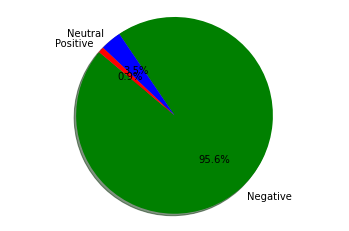

In [25]:
#Categorize Polarity into Positive, Neutral or Negative
labels = ["Negative", "Neutral", "Positive"]
#Initialize count array
values =[0,0,0]

#Categorize each review
for review in new_wordslist:
    sentiment = TextBlob(review)
    
    #Custom formula to convert polarity 
    # 0 = (Negative) 1 = (Neutral) 2=(Positive)
    polarity = round(( sentiment.polarity + 1 ) * 3 ) % 3
    
    #add the summary array
    values[polarity] = values[polarity] + 1
    
print("Final summarized counts :", values)

import matplotlib.pyplot as plt
#Set colors by label
colors=["Green","Blue","Red"]

print("\n Pie Representation \n-------------------")
#Plot a pie chart
plt.pie(values, labels=labels, colors=colors, \
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()